In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
import seaborn as sns
%matplotlib notebook

In [2]:
df = pd.read_csv('df.csv')
df_wt = df[df.Line == 'nwg201']
df_c56s = df[df.Line == 'nwg246']

In [3]:
def get_profiles(df):
    paths = df.Path.to_list()
    dosages = df.Dosage_af.to_list()
    orders = np.argsort(np.array(df.Dosage_af))[::-1]
    paths_sorted = [paths[o] for o in orders]
    dosages_sorted = [dosages[o] for o in orders]
    imgs = [load_image(p + '/af_corrected.tif') for p in paths_sorted]
    rois = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_sorted]
    straights = [straighten(i, r, 50, ninterp=500) for i, r in zip(imgs, rois)]
    profiles = [np.mean(s, axis=1) for s in straights]
    profiles_norm = [p / bounded_mean_1d(p, [0.9, 1]) for p in profiles]
    return dosages_sorted, profiles, paths_sorted

In [4]:
dos_wt, prof_wt, paths_wt = get_profiles(df_wt)
dos_c56s, prof_c56s, paths_c56s = get_profiles(df_c56s)

In [5]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')

# x = np.linspace(- 25 * 0.255, 25 * 0.255, 500)

# for d, p in zip(dos_wt, prof_wt):
#     ax.plot3D(x, d * np.ones([500]), p, c='tab:blue', alpha=0.5)
    
# ax.grid(False)
# ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.set_xlabel('Position (μm)')
# ax.set_ylabel('Dosage (a.u)')
# ax.set_zlabel('Intensity (a.u)')
# ax.set_zlim(bottom=0, top=15000)
# ax.set_ylim(bottom=0)
# ax.view_init(elev=10, azim=310)
# ax.tick_params(axis='both', labelsize=7)

In [6]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')

# x = np.linspace(- 25 * 0.255, 25 * 0.255, 500)

# for d, p in zip(dos_c56s, prof_c56s):
#     ax.plot3D(x, d * np.ones([500]), p, c='tab:orange', alpha=0.5)
    
# ax.grid(False)
# ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.set_xlabel('Position (μm)')
# ax.set_ylabel('Dosage (a.u)')
# ax.set_zlabel('Intensity (a.u)')
# ax.set_zlim(bottom=0, top=15000)
# ax.set_ylim(bottom=0)
# ax.view_init(elev=10, azim=310)
# ax.tick_params(axis='both', labelsize=7)

### Images

In [7]:
wt_full = '/Users/blandt/Desktop/Data/Rundowns/Par2 rundown Neon Jan 2020/200131_nwg201_wt_tom4,15,60/22'
wt_half = '/Users/blandt/Desktop/Data/Rundowns/Par2 rundown Neon Jan 2020/200131_nwg201_2001310930par2_tom4,15,60/57'
wt_quarter = '/Users/blandt/Desktop/Data/Rundowns/Par2 rundown Neon Jan 2020/200131_nwg201_2001310930par2_tom4,15,60/64'

c56s_full = '/Users/blandt/Desktop/Data/Rundowns/Par2 rundown Neon Jan 2020/200131_nwg246_wt_tom4,15,60/22'
c56s_half = '/Users/blandt/Desktop/Data/Rundowns/Par2 rundown Neon Jan 2020/200131_nwg246_2001310930par2_tom4,15,60/55'
c56s_quarter = '/Users/blandt/Desktop/Data/Rundowns/Par2 rundown Neon Jan 2020/200131_nwg246_2001310930par2_tom4,15,60/72'


In [30]:
def func(ax, path):
    img = load_image(path + '/af_corrected.tif')
    roi = np.loadtxt(path + '/ROI_fit.txt')
    rotated = rotated_embryo(img, roi, 250, 180, 3)
    ax.imshow(rotated, vmin=0, vmax=22000, cmap='gray')
    ax.axis('off')

<IPython.core.display.Javascript object>


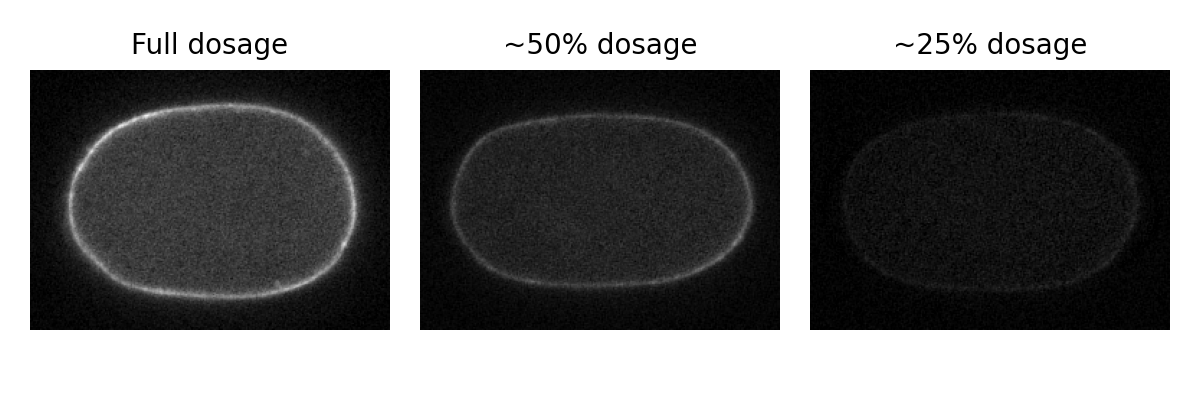

In [31]:
fig, ax = plt.subplots(1, 3)
func(ax[0], wt_full)
func(ax[1], wt_half)
func(ax[2], wt_quarter)
[a.set_title(t, fontsize=10) for a, t in zip(ax, ['Full dosage', '~50% dosage', '~25% dosage'])]
fig.set_size_inches(6, 2)
fig.tight_layout()
fig.savefig('Figs/imgs_wt.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


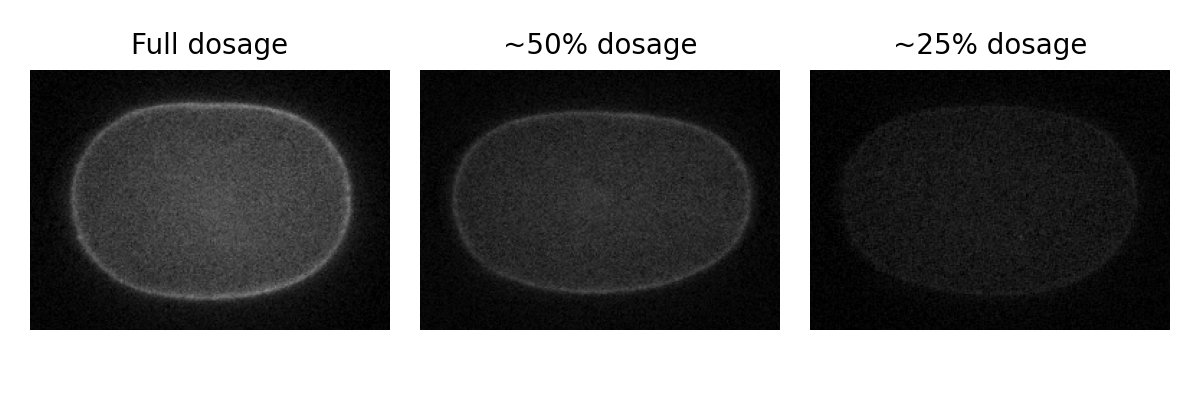

In [32]:
fig, ax = plt.subplots(1, 3)
func(ax[0], c56s_full)
func(ax[1], c56s_half)
func(ax[2], c56s_quarter)
[a.set_title(t, fontsize=10) for a, t in zip(ax, ['Full dosage', '~50% dosage', '~25% dosage'])]
fig.set_size_inches(6, 2)
fig.tight_layout()
fig.savefig('Figs/imgs_c56s.png', dpi=600, transparent=True)

In [16]:
def func(ax, path, c='tab:blue'):
    img = load_image(path + '/af_corrected.tif')
    roi = np.loadtxt(path + '/ROI_fit.txt')
    straight = straighten(img, roi, 50, ninterp=500)
    profile = np.mean(straight, axis=1)
    profile_std = np.std(straight, axis=1)
    profile, profile_std = profile / np.mean(profile[450:]), profile_std / np.mean(profile[450:])
    x = np.linspace(- 25 * 0.255, 25 * 0.255, 500)
    ax.plot(x, profile, c=c)
    ax.fill_between(x, profile - profile_std, profile + profile_std, alpha=0.2, color=c)
    ax.set_ylim(0, 3)
    ax.axhline(1, linestyle='--', c='0.8', zorder=0)
    ax.tick_params(axis='both', labelsize=8)
    ax.set_xlabel('Position (μm)')
    ax.set_yticks([0, 1, 2, 3])
    ax.set_yticklabels(['', '', '', ''])

<IPython.core.display.Javascript object>


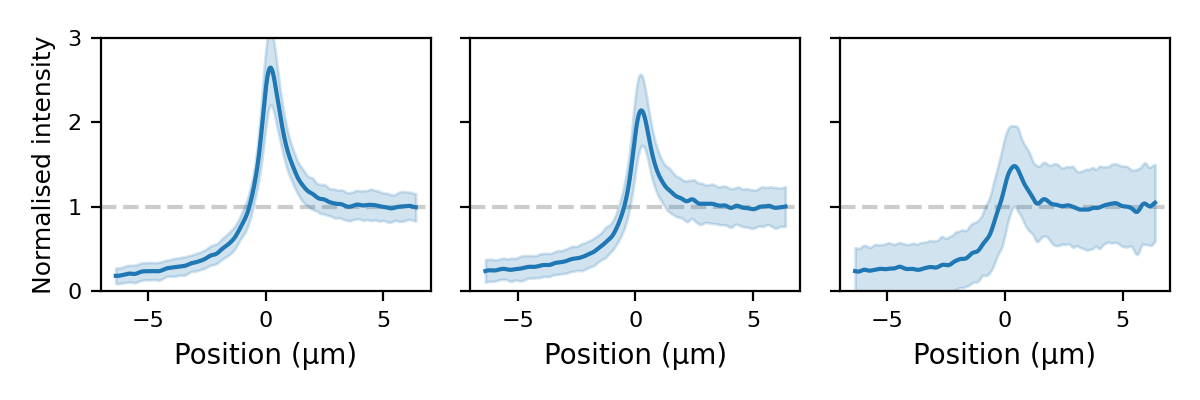

In [21]:
fig, ax = plt.subplots(1, 3)
func(ax[0], wt_full)
func(ax[1], wt_half)
func(ax[2], wt_quarter)
ax[0].set_ylabel('Normalised intensity', fontsize=9)
ax[0].set_yticks([0, 1, 2, 3])
ax[0].set_yticklabels([0, 1, 2, 3])
fig.set_size_inches(6, 2)
fig.tight_layout()
fig.savefig('Figs/profiles_wt.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


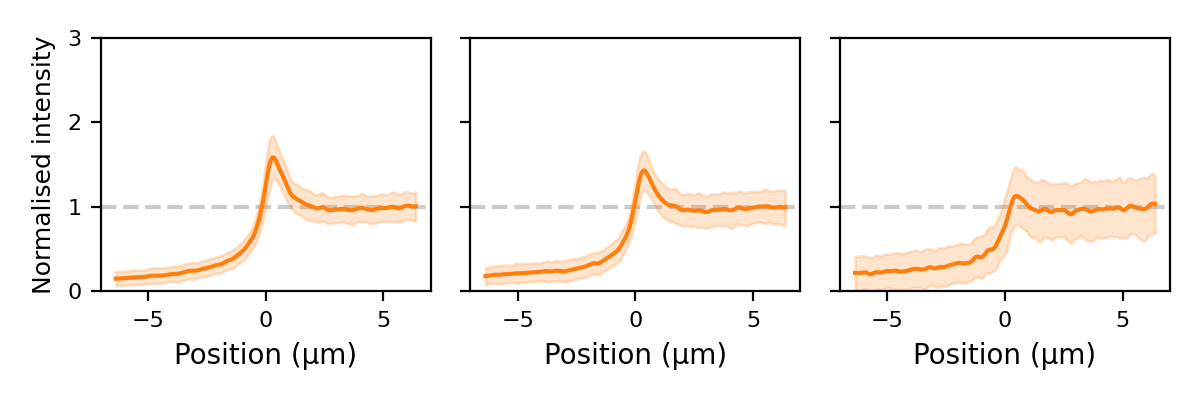

In [22]:
fig, ax = plt.subplots(1, 3)
func(ax[0], c56s_full, c='tab:orange')
func(ax[1], c56s_half, c='tab:orange')
func(ax[2], c56s_quarter, c='tab:orange')
ax[0].set_ylabel('Normalised intensity', fontsize=9)
ax[0].set_yticks([0, 1, 2, 3])
ax[0].set_yticklabels([0, 1, 2, 3])
fig.set_size_inches(6, 2)
fig.tight_layout()
fig.savefig('Figs/profiles_c56s.png', dpi=600, transparent=True)